https://python-scripts.com/requests <br>
https://ru.wikipedia.org/wiki/HTTP

Каждое HTTP-сообщение состоит из трёх частей, которые передаются в указанном порядке:

    Стартовая строка (англ. Starting line) — определяет тип сообщения;
    Заголовки (англ. Headers) — характеризуют тело сообщения, параметры передачи и прочие сведения;
    Тело сообщения (англ. Message Body) — непосредственно данные сообщения. Обязательно должно отделяться от заголовков пустой строкой.

Тело сообщения может отсутствовать, но стартовая строка и заголовок являются обязательными элементами. Исключением является версия 0.9 протокола, у которой сообщение запроса содержит только стартовую строку, а сообщения ответа — только тело сообщения.

Для версии протокола 1.1 сообщение запроса обязательно должно содержать заголовок Host. 

Стартовая строка

Стартовые строки различаются для запроса и ответа. Строка запроса выглядит так:

    GET URI — для версии протокола 0.9;
    Метод URI HTTP/Версия — для остальных версий.

Здесь:

    Метод (англ. Method) — тип запроса, одно слово заглавными буквами. В версии HTTP 0.9 использовался только метод GET, список методов для версии 1.1 представлен ниже.
    URI определяет путь к запрашиваемому документу.
    Версия (англ. Version) — пара разделённых точкой цифр. Например: 1.0.

Чтобы запросить страницу данной статьи, клиент должен передать строку (задан всего один заголовок):

GET /wiki/HTTP HTTP/1.0
Host: ru.wikipedia.org

Стартовая строка ответа сервера имеет следующий формат: HTTP/Версия КодСостояния Пояснение, где:

    Версия — пара разделённых точкой цифр, как в запросе;
    Код состояния (англ. Status Code) — три цифры. По коду состояния определяется дальнейшее содержимое сообщения и поведение клиента;
    Пояснение (англ. Reason Phrase) — текстовое короткое пояснение к коду ответа для пользователя. Никак не влияет на сообщение и является необязательным.

Например, стартовая строка ответа сервера на предыдущий запрос может выглядеть так:

HTTP/1.0 200 OK

Методы

Метод HTTP (англ. HTTP Method) — последовательность из любых символов, кроме управляющих и разделителей, указывающая на основную операцию над ресурсом. Обычно метод представляет собой короткое английское слово, записанное заглавными буквами. Обратите внимание, что название метода чувствительно к регистру.

Сервер может использовать любые методы, не существует обязательных методов для сервера или клиента. Если сервер не распознал указанный клиентом метод, то он должен вернуть статус 501 (Not Implemented). Если серверу метод известен, но он неприменим к конкретному ресурсу, то возвращается сообщение с кодом 405 (Method Not Allowed). В обоих случаях серверу следует включить в сообщение ответа заголовок Allow со списком поддерживаемых методов.

Кроме методов GET и HEAD, часто применяется метод POST.

OPTIONS

Используется для определения возможностей веб-сервера или параметров соединения для конкретного ресурса. В ответ серверу следует включить заголовок Allow со списком поддерживаемых методов. Также в заголовке ответа может включаться информация о поддерживаемых расширениях.

Предполагается, что запрос клиента может содержать тело сообщения для указания интересующих его сведений. Формат тела и порядок работы с ним в настоящий момент не определён; сервер пока должен его игнорировать. Аналогичная ситуация и с телом в ответе сервера.

Для того, чтобы узнать возможности всего сервера, клиент должен указать в URI звёздочку — «*». Запросы «OPTIONS * HTTP/1.1» могут также применяться для проверки работоспособности сервера (аналогично «пингованию») и тестирования на предмет поддержки сервером протокола HTTP версии 1.1.

Результат выполнения этого метода не кэшируется.

GET

Используется для запроса содержимого указанного ресурса. С помощью метода GET можно также начать какой-либо процесс. В этом случае в тело ответного сообщения следует включить информацию о ходе выполнения процесса.

Клиент может передавать параметры выполнения запроса в URI целевого ресурса после символа «?»:
GET /path/resource?param1=value1&param2=value2 HTTP/1.1

Кроме обычного метода GET, различают ещё

    Условный GET — содержит заголовки If-Modified-Since, If-Match, If-Range и подобные;
    Частичный GET — содержит в запросе Range.

Порядок выполнения подобных запросов определён стандартами отдельно.

HEAD

Аналогичен методу GET, за исключением того, что в ответе сервера отсутствует тело. Запрос HEAD обычно применяется для извлечения метаданных, проверки наличия ресурса (валидация URL) и чтобы узнать, не изменился ли он с момента последнего обращения.

Заголовки ответа могут кэшироваться. При несовпадении метаданных ресурса с соответствующей информацией в кэше — копия ресурса помечается как устаревшая.

POST

Применяется для передачи пользовательских данных заданному ресурсу. Например, в блогах посетители обычно могут вводить свои комментарии к записям в HTML-форму, после чего они передаются серверу методом POST и он помещает их на страницу. При этом передаваемые данные (в примере с блогами — текст комментария) включаются в тело запроса. Аналогично с помощью метода POST обычно загружаются файлы на сервер.

В отличие от метода GET, метод POST не считается идемпотентным[2], то есть многократное повторение одних и тех же запросов POST может возвращать разные результаты (например, после каждой отправки комментария будет появляться очередная копия этого комментария).

При результате выполнения 200 (Ok) в тело ответа следует включить сообщение об итоге выполнения запроса. Если был создан ресурс, то серверу следует вернуть ответ 201 (Created) с указанием URI нового ресурса в заголовке Location.

Сообщение ответа сервера на выполнение метода POST не кэшируется.

PUT

Применяется для загрузки содержимого запроса на указанный в запросе URI. Если по заданному URI не существует ресурса, то сервер создаёт его и возвращает статус 201 (Created). Если же ресурс был изменён, то сервер возвращает 200 (Ok) или 204 (No Content). Сервер не должен игнорировать некорректные заголовки Content-*, передаваемые клиентом вместе с сообщением. Если какой-то из этих заголовков не может быть распознан или недопустим при текущих условиях, то необходимо вернуть код ошибки 501 (Not Implemented).

Фундаментальное различие методов POST и PUT заключается в понимании предназначений URI ресурсов. Метод POST предполагает, что по указанному URI будет производиться обработка передаваемого клиентом содержимого. Используя PUT, клиент предполагает, что загружаемое содержимое соответствует находящемуся по данному URI ресурсу.

Сообщения ответов сервера на метод PUT не кэшируются.

PATCH
Аналогично PUT, но применяется только к фрагменту ресурса.

DELETE
Удаляет указанный ресурс.

TRACE
Возвращает полученный запрос так, что клиент может увидеть, какую информацию промежуточные серверы добавляют или изменяют в запросе.

CONNECT
Преобразует соединение запроса в прозрачный TCP/IP-туннель, обычно чтобы содействовать установлению защищённого SSL-соединения через нешифрованный прокси.
Коды состояния
Основная статья: Список кодов состояния HTTP

Код состояния является частью первой строки ответа сервера. Он представляет собой целое число из трёх цифр[3]. Первая цифра указывает на класс состояния. За кодом ответа обычно следует отделённая пробелом поясняющая фраза на английском языке, которая разъясняет человеку причину именно такого ответа. Примеры:

201 Webpage Created
403 Access allowed only for registered users
507 Insufficient Storage

Клиент узнаёт по коду ответа о результатах его запроса и определяет, какие действия ему предпринимать дальше. Набор кодов состояния является стандартом, и они описаны в соответствующих документах RFC. Введение новых кодов должно производиться только после согласования с IETF. Клиент может не знать все коды состояния, но он обязан отреагировать в соответствии с классом кода. 

**1xx** - Информационный класс. Информирование о процессе передачи.

В HTTP/1.0 — сообщения с такими кодами должны игнорироваться.

В HTTP/1.1 — клиент должен быть готов принять этот класс сообщений как обычный ответ, но ничего отправлять серверу не нужно. 

**2xx** - Успех Информирование о случаях успешного принятия и обработки запроса клиента. В зависимости от статуса, сервер может ещё передать заголовки и тело сообщения. 

**3xx** - Перенаправление  Сообщает клиенту, что для успешного выполнения операции необходимо сделать другой запрос (как правило по другому URI). Из данного класса пять кодов 301, 302, 303, 305 и 307 относятся непосредственно к перенаправлениям (редирект). Адрес, по которому клиенту следует произвести запрос, сервер указывает в заголовке Location. При этом допускается использование фрагментов в целевом URI. 

**4xx** - Ошибка клиента

**5xx** - Ошибка сервера

## Get
Метод GET указывает на то, что происходит попытка извлечь данные из определенного ресурса. Для того, чтобы выполнить запрос GET, используется requests.get().
Для проверки работы команды будет выполнен запрос GET в отношении Root REST API на GitHub. Для указанного ниже URL вызывается метод get().

In [1]:
import requests

In [2]:
requests.get('https://api.github.com')

<Response [200]>

Response - это объект

In [9]:
response = requests.get('https://api.github.com')
response

<Response [200]>

Посмотрим напрямую HTTP код состояния, которуй вернулся с сервера

In [10]:
response.status_code

200

In [11]:
if response.status_code == 200:
    print('Success!')
elif response.status_code == 404:
    print('Not Found.')

Success!


204 NO CONTENT <br>
304 NOT MODIFIED <br>
404 Not Found <br>

Допустим, если при использовании оператора if вы не хотите проверять код состояния, можно расширить диапазон исключений для неудачных результатов запроса. Это можно сделать при помощи использования .raise_for_status().

In [12]:
from requests.exceptions import HTTPError

In [14]:
for url in ['https://api.github.com',
            'https://api.github.com/invalid']:
    try:
        responce = requests.get(url)
        responce.raise_for_status()
    except HTTPError as http_err:
        print(f'HTTP error occured: {http_err}')
    except Exception as err:
        print(f"Other error occured: {err}")
    else:
        print("Succcess!")

Succcess!
HTTP error occured: 404 Client Error: Not Found for url: https://api.github.com/invalid


## Получить содержимое страницы в Requests

Зачастую ответ на запрос GET содержит весьма ценную информацию. Она находится в теле сообщения и называется пейлоад (payload). 

Для того, чтобы получить содержимое запроса в байтах, необходимо использовать .content.

In [15]:
response = requests.get('https://api.github.com')
response.content

b'{"current_user_url":"https://api.github.com/user","current_user_authorizations_html_url":"https://github.com/settings/connections/applications{/client_id}","authorizations_url":"https://api.github.com/authorizations","code_search_url":"https://api.github.com/search/code?q={query}{&page,per_page,sort,order}","commit_search_url":"https://api.github.com/search/commits?q={query}{&page,per_page,sort,order}","emails_url":"https://api.github.com/user/emails","emojis_url":"https://api.github.com/emojis","events_url":"https://api.github.com/events","feeds_url":"https://api.github.com/feeds","followers_url":"https://api.github.com/user/followers","following_url":"https://api.github.com/user/following{/target}","gists_url":"https://api.github.com/gists{/gist_id}","hub_url":"https://api.github.com/hub","issue_search_url":"https://api.github.com/search/issues?q={query}{&page,per_page,sort,order}","issues_url":"https://api.github.com/issues","keys_url":"https://api.github.com/user/keys","label_sea

Использование .content обеспечивает доступ к чистым байтам ответного пейлоада, то есть к любым данным в теле запроса. 

Чтобы конвертировать полученную информацию в строку в кодировке UTF-8. response делает это при помощи .text

In [17]:
response.text

'{"current_user_url":"https://api.github.com/user","current_user_authorizations_html_url":"https://github.com/settings/connections/applications{/client_id}","authorizations_url":"https://api.github.com/authorizations","code_search_url":"https://api.github.com/search/code?q={query}{&page,per_page,sort,order}","commit_search_url":"https://api.github.com/search/commits?q={query}{&page,per_page,sort,order}","emails_url":"https://api.github.com/user/emails","emojis_url":"https://api.github.com/emojis","events_url":"https://api.github.com/events","feeds_url":"https://api.github.com/feeds","followers_url":"https://api.github.com/user/followers","following_url":"https://api.github.com/user/following{/target}","gists_url":"https://api.github.com/gists{/gist_id}","hub_url":"https://api.github.com/hub","issue_search_url":"https://api.github.com/search/issues?q={query}{&page,per_page,sort,order}","issues_url":"https://api.github.com/issues","keys_url":"https://api.github.com/user/keys","label_sear

Декодирование байтов в строку требует наличия определенной модели кодировки. По умолчанию requests попытается узнать текущую кодировку, ориентируясь по заголовкам HTTP. Указать необходимую кодировку можно при помощи добавления .encoding перед .text.

In [19]:
response.encoding = 'utf-8' # Optional: requests infers this internally
# запросы делают это внутренне 
response.text

'{"current_user_url":"https://api.github.com/user","current_user_authorizations_html_url":"https://github.com/settings/connections/applications{/client_id}","authorizations_url":"https://api.github.com/authorizations","code_search_url":"https://api.github.com/search/code?q={query}{&page,per_page,sort,order}","commit_search_url":"https://api.github.com/search/commits?q={query}{&page,per_page,sort,order}","emails_url":"https://api.github.com/user/emails","emojis_url":"https://api.github.com/emojis","events_url":"https://api.github.com/events","feeds_url":"https://api.github.com/feeds","followers_url":"https://api.github.com/user/followers","following_url":"https://api.github.com/user/following{/target}","gists_url":"https://api.github.com/gists{/gist_id}","hub_url":"https://api.github.com/hub","issue_search_url":"https://api.github.com/search/issues?q={query}{&page,per_page,sort,order}","issues_url":"https://api.github.com/issues","keys_url":"https://api.github.com/user/keys","label_sear

Содержимое ответа является сериализированным JSON контентом. Воспользовавшись словарем, можно взять полученные из .text строки str и провести с ними обратную сериализацию при помощи использования json.loads(). 

In [29]:
import json
json.loads(responce.text) # ??????

{'message': 'Not Found', 'documentation_url': 'https://docs.github.com/rest'}

In [27]:
response.json()

{'current_user_url': 'https://api.github.com/user',
 'current_user_authorizations_html_url': 'https://github.com/settings/connections/applications{/client_id}',
 'authorizations_url': 'https://api.github.com/authorizations',
 'code_search_url': 'https://api.github.com/search/code?q={query}{&page,per_page,sort,order}',
 'commit_search_url': 'https://api.github.com/search/commits?q={query}{&page,per_page,sort,order}',
 'emails_url': 'https://api.github.com/user/emails',
 'emojis_url': 'https://api.github.com/emojis',
 'events_url': 'https://api.github.com/events',
 'feeds_url': 'https://api.github.com/feeds',
 'followers_url': 'https://api.github.com/user/followers',
 'following_url': 'https://api.github.com/user/following{/target}',
 'gists_url': 'https://api.github.com/gists{/gist_id}',
 'hub_url': 'https://api.github.com/hub',
 'issue_search_url': 'https://api.github.com/search/issues?q={query}{&page,per_page,sort,order}',
 'issues_url': 'https://api.github.com/issues',
 'keys_url': '

## HTTP заголовки в Requests

В HTTP заголовках может содержаться информация о типе содержимого ответного peyload-a, а также ограничение по времени для кэширование ответа. <br>
Посмотрим на атрибут .headers

In [30]:
response.headers

{'Server': 'GitHub.com', 'Date': 'Thu, 04 Nov 2021 10:21:17 GMT', 'Cache-Control': 'public, max-age=60, s-maxage=60', 'Vary': 'Accept, Accept-Encoding, Accept, X-Requested-With', 'ETag': '"4f825cc84e1c733059d46e76e6df9db557ae5254f9625dfe8e1b09499c449438"', 'Access-Control-Expose-Headers': 'ETag, Link, Location, Retry-After, X-GitHub-OTP, X-RateLimit-Limit, X-RateLimit-Remaining, X-RateLimit-Used, X-RateLimit-Resource, X-RateLimit-Reset, X-OAuth-Scopes, X-Accepted-OAuth-Scopes, X-Poll-Interval, X-GitHub-Media-Type, Deprecation, Sunset', 'Access-Control-Allow-Origin': '*', 'Strict-Transport-Security': 'max-age=31536000; includeSubdomains; preload', 'X-Frame-Options': 'deny', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '0', 'Referrer-Policy': 'origin-when-cross-origin, strict-origin-when-cross-origin', 'Content-Security-Policy': "default-src 'none'", 'Content-Type': 'application/json; charset=utf-8', 'X-GitHub-Media-Type': 'github.v3; format=json', 'Content-Encoding': 'gzip',

.headers возвращает словарь, что позволяет получить доступ к значению заголовка HTTP по ключу. Например, для просмотра типа содержимого ответного пейлоада, требуется использовать Content-Type: **'Content-Type': 'application/json;**

In [31]:
response.headers['Content-Type']

'application/json; charset=utf-8'

Специфика HTTP предполагает, что заголовки не чувствительны к регистру

In [32]:
response.headers['content-type']

'application/json; charset=utf-8'

## Python Requests параметры запроса

A **query string** is a part of a uniform resource locator (URL) that assigns values to specified parameters. A query string commonly includes fields added to a base URL by a Web browser or other client application, for example as part of an HTML form. <br>
https://en.wikipedia.org/wiki/Query_string

Наиболее простым способом настроить запрос GET является передача значений через параметры *строки запроса* в URL. При использовании метода get(), данные передаются в params. <br>Например, для того, чтобы посмотреть на библиотеку requests можно использовать Search API на GitHub.

In [33]:
# Поиск местонахождения для запросов на GitHub
response = requests.get(
    'https://api.github.com/search/repositories')

In [35]:
response
# 422 Unprocessable Entity
# A 422 status code occurs when a request is well-formed,
# however, due to semantic errors it is unable to be processed

<Response [422]>

In [36]:
response = requests.get(
    'https://api.github.com/search/repositories',
    params={'q': 'requests+language:python'},
)

In [37]:
response

<Response [200]>

Видимо, чтобы что-то понять, надо прочитать:<br>
https://docs.github.com/en/rest/reference/search

Передавая словарь {'q': 'requests+language:python'} в параметр params, который является частью .get(), можно изменить ответ, что был получен при использовании Search API

In [39]:
# Анализ некоторых атрибутов местонахождения запросов
json_response = response.json()
json_response

{'total_count': 14888,
 'incomplete_results': False,
 'items': [{'id': 4290214,
   'node_id': 'MDEwOlJlcG9zaXRvcnk0MjkwMjE0',
   'name': 'grequests',
   'full_name': 'spyoungtech/grequests',
   'private': False,
   'owner': {'login': 'spyoungtech',
    'id': 15212758,
    'node_id': 'MDQ6VXNlcjE1MjEyNzU4',
    'avatar_url': 'https://avatars.githubusercontent.com/u/15212758?v=4',
    'gravatar_id': '',
    'url': 'https://api.github.com/users/spyoungtech',
    'html_url': 'https://github.com/spyoungtech',
    'followers_url': 'https://api.github.com/users/spyoungtech/followers',
    'following_url': 'https://api.github.com/users/spyoungtech/following{/other_user}',
    'gists_url': 'https://api.github.com/users/spyoungtech/gists{/gist_id}',
    'starred_url': 'https://api.github.com/users/spyoungtech/starred{/owner}{/repo}',
    'subscriptions_url': 'https://api.github.com/users/spyoungtech/subscriptions',
    'organizations_url': 'https://api.github.com/users/spyoungtech/orgs',
    're

In [40]:
json_response['items']

[{'id': 4290214,
  'node_id': 'MDEwOlJlcG9zaXRvcnk0MjkwMjE0',
  'name': 'grequests',
  'full_name': 'spyoungtech/grequests',
  'private': False,
  'owner': {'login': 'spyoungtech',
   'id': 15212758,
   'node_id': 'MDQ6VXNlcjE1MjEyNzU4',
   'avatar_url': 'https://avatars.githubusercontent.com/u/15212758?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/spyoungtech',
   'html_url': 'https://github.com/spyoungtech',
   'followers_url': 'https://api.github.com/users/spyoungtech/followers',
   'following_url': 'https://api.github.com/users/spyoungtech/following{/other_user}',
   'gists_url': 'https://api.github.com/users/spyoungtech/gists{/gist_id}',
   'starred_url': 'https://api.github.com/users/spyoungtech/starred{/owner}{/repo}',
   'subscriptions_url': 'https://api.github.com/users/spyoungtech/subscriptions',
   'organizations_url': 'https://api.github.com/users/spyoungtech/orgs',
   'repos_url': 'https://api.github.com/users/spyoungtech/repos',
   'events_url': 'htt

In [42]:
repository = json_response['items'][0]
repository

{'id': 4290214,
 'node_id': 'MDEwOlJlcG9zaXRvcnk0MjkwMjE0',
 'name': 'grequests',
 'full_name': 'spyoungtech/grequests',
 'private': False,
 'owner': {'login': 'spyoungtech',
  'id': 15212758,
  'node_id': 'MDQ6VXNlcjE1MjEyNzU4',
  'avatar_url': 'https://avatars.githubusercontent.com/u/15212758?v=4',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/spyoungtech',
  'html_url': 'https://github.com/spyoungtech',
  'followers_url': 'https://api.github.com/users/spyoungtech/followers',
  'following_url': 'https://api.github.com/users/spyoungtech/following{/other_user}',
  'gists_url': 'https://api.github.com/users/spyoungtech/gists{/gist_id}',
  'starred_url': 'https://api.github.com/users/spyoungtech/starred{/owner}{/repo}',
  'subscriptions_url': 'https://api.github.com/users/spyoungtech/subscriptions',
  'organizations_url': 'https://api.github.com/users/spyoungtech/orgs',
  'repos_url': 'https://api.github.com/users/spyoungtech/repos',
  'events_url': 'https://api.github.com/

In [43]:
repository["name"]

'grequests'

In [44]:
repository["description"]

'Requests + Gevent = <3'

Можно передать параметры в get() в форме словаря, как было показано выше. Также можно использовать список кортежей или значение в байтах

In [46]:
requests.get(
    'https://api.github.com/search/repositories',
    params=[('q', 'requests+language:python')],
)

<Response [200]>

In [47]:
requests.get(
    'https://api.github.com/search/repositories',
    params=b'q=requests+language:python',
)

<Response [200]>

## Настройка HTTP заголовка запроса (headers)

Для изменения HTTP заголовка требуется передать словарь данного HTTP заголовка в get() при помощи использования параметра *headers*. Например, можно изменить предыдущий поисковой запрос, подсветив совпадения в результате. Для этого в заголовке *Accept* медиа тип уточняется при помощи *text-match*.

In [48]:
response = requests.get(
    'https://api.github.com/search/repositories',
    params={'q': 'requests+language:python'},
    headers={'Accept': 'application/vnd.github.v3.text-match+json'},
)
 
# просмотр нового массива `text-matches` с предоставленными данными
# о поиске в пределах результатов
json_response = response.json()
repository = json_response['items'][0]

In [49]:
json_response

{'total_count': 14887,
 'incomplete_results': False,
 'items': [{'id': 4290214,
   'node_id': 'MDEwOlJlcG9zaXRvcnk0MjkwMjE0',
   'name': 'grequests',
   'full_name': 'spyoungtech/grequests',
   'private': False,
   'owner': {'login': 'spyoungtech',
    'id': 15212758,
    'node_id': 'MDQ6VXNlcjE1MjEyNzU4',
    'avatar_url': 'https://avatars.githubusercontent.com/u/15212758?v=4',
    'gravatar_id': '',
    'url': 'https://api.github.com/users/spyoungtech',
    'html_url': 'https://github.com/spyoungtech',
    'followers_url': 'https://api.github.com/users/spyoungtech/followers',
    'following_url': 'https://api.github.com/users/spyoungtech/following{/other_user}',
    'gists_url': 'https://api.github.com/users/spyoungtech/gists{/gist_id}',
    'starred_url': 'https://api.github.com/users/spyoungtech/starred{/owner}{/repo}',
    'subscriptions_url': 'https://api.github.com/users/spyoungtech/subscriptions',
    'organizations_url': 'https://api.github.com/users/spyoungtech/orgs',
    're

In [50]:
repository

{'id': 4290214,
 'node_id': 'MDEwOlJlcG9zaXRvcnk0MjkwMjE0',
 'name': 'grequests',
 'full_name': 'spyoungtech/grequests',
 'private': False,
 'owner': {'login': 'spyoungtech',
  'id': 15212758,
  'node_id': 'MDQ6VXNlcjE1MjEyNzU4',
  'avatar_url': 'https://avatars.githubusercontent.com/u/15212758?v=4',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/spyoungtech',
  'html_url': 'https://github.com/spyoungtech',
  'followers_url': 'https://api.github.com/users/spyoungtech/followers',
  'following_url': 'https://api.github.com/users/spyoungtech/following{/other_user}',
  'gists_url': 'https://api.github.com/users/spyoungtech/gists{/gist_id}',
  'starred_url': 'https://api.github.com/users/spyoungtech/starred{/owner}{/repo}',
  'subscriptions_url': 'https://api.github.com/users/spyoungtech/subscriptions',
  'organizations_url': 'https://api.github.com/users/spyoungtech/orgs',
  'repos_url': 'https://api.github.com/users/spyoungtech/repos',
  'events_url': 'https://api.github.com/

In [51]:
repository["text_matches"]

[{'object_url': 'https://api.github.com/repositories/4290214',
  'object_type': 'Repository',
  'property': 'description',
  'fragment': 'Requests + Gevent = <3',
  'matches': [{'text': 'Requests', 'indices': [0, 8]}]}]

In [52]:
repository["name"]

'grequests'

## Примеры HTTP методов в Requests
Помимо GET, большой популярностью пользуются такие методы, как POST, PUT, DELETE, HEAD, PATCH и OPTIONS. Для каждого из этих методов существует своя сигнатура, которая очень похожа на метод get().

In [54]:
response = requests.post('https://httpbin.org/post', data={'key':'value'})

In [55]:
response.content

b'{\n  "args": {}, \n  "data": "", \n  "files": {}, \n  "form": {\n    "key": "value"\n  }, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate", \n    "Content-Length": "9", \n    "Content-Type": "application/x-www-form-urlencoded", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.24.0", \n    "X-Amzn-Trace-Id": "Root=1-6183c987-7cc6e8086c8ba75328e6a89e"\n  }, \n  "json": null, \n  "origin": "217.72.11.51", \n  "url": "https://httpbin.org/post"\n}\n'

In [56]:
response = requests.put('https://httpbin.org/put', data={'key':'value'})

In [57]:
response.content

b'{\n  "args": {}, \n  "data": "", \n  "files": {}, \n  "form": {\n    "key": "value"\n  }, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate", \n    "Content-Length": "9", \n    "Content-Type": "application/x-www-form-urlencoded", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.24.0", \n    "X-Amzn-Trace-Id": "Root=1-6183c99b-63e145df443293d60f478694"\n  }, \n  "json": null, \n  "origin": "217.72.11.51", \n  "url": "https://httpbin.org/put"\n}\n'

In [58]:
response = requests.delete('https://httpbin.org/delete')
response.content

b'{\n  "args": {}, \n  "data": "", \n  "files": {}, \n  "form": {}, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate", \n    "Content-Length": "0", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.24.0", \n    "X-Amzn-Trace-Id": "Root=1-6183c9b6-3343005c5bfb26b6585bd9bf"\n  }, \n  "json": null, \n  "origin": "217.72.11.51", \n  "url": "https://httpbin.org/delete"\n}\n'

In [59]:
response = requests.head('https://httpbin.org/get')
response.headers['Content-Type']

'application/json'

## Python Requests тело сообщения

POST, PUT и PATCH передают информацию через тело сообщения, а не через параметры строки запроса. <br>
Используя requests, можно передать данные в параметр data.<br>
В свою очередь data использует словарь, список кортежей, байтов или объект файла. <br>
К примеру, если тип содержимого запроса application/x-www-form-urlencoded, можно отправить данные формы в виде словаря или списка кортежей.

In [60]:
requests.post('https://httpbin.org/post', data=[('key', 'value')])

<Response [200]>

In [61]:
requests.post('https://httpbin.org/post', data={'key':'value'})

<Response [200]>

### https://httpbin.org/ 

In [62]:
json_response = requests.post('https://httpbin.org/post',
                              json={'key':'value'}).json()

In [63]:
json_response['data']

'{"key": "value"}'

In [65]:
json_response['headers']

{'Accept': '*/*',
 'Accept-Encoding': 'gzip, deflate',
 'Content-Length': '16',
 'Content-Type': 'application/json',
 'Host': 'httpbin.org',
 'User-Agent': 'python-requests/2.24.0',
 'X-Amzn-Trace-Id': 'Root=1-6183cc8a-7ab20c9b7ccec4362c3686f4'}

In [66]:
json_response['headers']['Content-Type']

'application/json'

Здесь видно, что сервер получил данные и HTTP заголовки, отправленные вместе с запросом. requests также предоставляет информацию в форме PreparedRequest.

## Python Requests анализ запроса

При составлении запроса стоит иметь в виду, что перед его фактической отправкой на целевой сервер библиотека requests выполняет определенную подготовку. Подготовка запроса включает в себя такие вещи, как проверка заголовков и сериализация содержимого JSON. <br><br>
Если открыть .request, можно просмотреть PreparedRequest.

In [69]:
response = requests.post('https://httpbin.org/post',
                         json={'key':'value'})
response.request.headers['Content-Type']

'application/json'

In [70]:
response.request.url

'https://httpbin.org/post'

In [71]:
response.request.body

b'{"key": "value"}'

Проверка PreparedRequest открывает доступ ко всей информации о выполняемом запросе. Это может быть пейлоад, URL, заголовки, аутентификация и многое другое.

## Python Requests аутентификация HTTP AUTH

Аутентификация помогает сервису понять, кто вы. Как правило, вы предоставляете свои учетные данные на сервер, передавая данные через заголовок Authorization или пользовательский заголовок, определенной службы. Все функции запроса, которые вы видели до этого момента, предоставляют параметр с именем auth, который позволяет вам передавать свои учетные данные.<br>
Одним из примеров API, который требует аутентификации, является Authenticated User API на GitHub. Это конечная точка веб-сервиса, которая предоставляет информацию о профиле аутентифицированного пользователя. Чтобы отправить запрос API-интерфейсу аутентифицированного пользователя, вы можете передать свое имя пользователя и пароль на GitHub через кортеж в get().

In [72]:
from getpass import getpass

In [82]:
requests.get('https://api.github.com/user',
             auth=('ishebarshina', getpass('pass:')))

pass:········


<Response [401]>

Example response — The HyperText Transfer Protocol (HTTP) 401 Unauthorized client error status response code indicates that the client request has not been... <br>
https://httpstatuses.com/401

In [85]:
from requests.auth import HTTPBasicAuth
requests.get(
    'https://api.github.com/user',
    auth=HTTPBasicAuth('ishebarshina', getpass())
)

········


<Response [401]>

#### Создание собственного механизма аутентификации
Для этого необходимо сначала создать подкласс AuthBase. Затем происходит имплементация __call__().

In [93]:
from requests.auth import AuthBase

class TokenAuth(AuthBase):
    """Implements a custom authentication scheme."""
    
    def __init__(self, token):
        self.token = token
    
    def __call__(self, r):
        """Attach an APU token to a custom auth header"""
        r.headers['X-TokenAuth'] = f'{self.token}'
        return r

requests.get('https://httpbin.org/get',
             auth=TokenAuth('anything_but_magic_12345abcde-token'))
# WHAT is this 12345abcde-token????
# Whaaaat I don't understand

<Response [200]>

https://en.wikipedia.org/wiki/Security_token

In [95]:
from bs4 import BeautifulSoup

In [96]:
r = requests.get("https://worldtable.info/gosudarstvo/tablica-rozhdaemosti-po-godam-rossija.html")

In [97]:
r

<Response [200]>

In [102]:
html = BeautifulSoup(r.content)
html

<!DOCTYPE html>
<html lang="ru">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<title>Таблица рождаемости в России по годам</title>
<meta content="301\r\n, 147\r\n, 638\r\n, 637\r\n" name="keywords"/>
<meta content="В таблице содержится информация о рождаемости в России с 1959 по 2020 годы." name="description"/>
<script src="/includes/jquery/jquery.js" type="text/javascript"></script>
<script src="/core/js/common.js" type="text/javascript"></script>
<script src="/components/comments/js/comments.js" type="text/javascript"></script>
<link href="/templates/_default_b_/css/bootstrap.css" rel="stylesheet" type="text/css"/>
<link href="/templates/_default_b_/css/responsive.css" rel="stylesheet" type="text/css"/>
<link href="/templates/_default_b_/css/style.css" rel="stylesheet" type="text/css"/>
<script src="/includes/jquery/colorbox/jquery.colorbox.js" type="text/javascript"></script>
<link href="/includes/jquery/colorbox/colorbox.css

<\tr> = table row <br>
<\td> = table cell<br>
тег table только один - только одна таблица<br>
метод find найдет первый нужный тег в документе<br>

In [103]:
data = []

In [104]:
# ищем первый (и единственный в этом случае) тег table
table = html.find("table") 

In [105]:
table

<table border="1" cellpadding="1" cellspacing="1" style="width: 100%;">
<caption>Рождаемость в России с 1959 по 2020 годы</caption>
<tbody>
<tr>
<td style="text-align: center;"><strong>Год</strong></td>
<td style="text-align: center;"><strong>Количество родившихся чел.</strong></td>
</tr>
<tr>
<td style="text-align: center;">1959</td>
<td style="text-align: center;">2 796 228</td>
</tr>
<tr>
<td style="text-align: center;">1960</td>
<td style="text-align: center;">2 782 353</td>
</tr>
<tr>
<td style="text-align: center;">1961</td>
<td style="text-align: center;">2 662 135</td>
</tr>
<tr>
<td style="text-align: center;">1962</td>
<td style="text-align: center;">2 482 539</td>
</tr>
<tr>
<td style="text-align: center;">1963</td>
<td style="text-align: center;">2 331 505</td>
</tr>
<tr>
<td style="text-align: center;">1964</td>
<td style="text-align: center;">2 121 994</td>
</tr>
<tr>
<td style="text-align: center;">1965</td>
<td style="text-align: center;">1 990 520</td>
</tr>
<tr>
<td s

In [106]:
for tr in table.find_all("tr"): # Проходим по всем строкам
    # Во всех строках проходим по всем ячейкам (столбцам)
    for td in tr.find_all("td"):
        print(td.get_text())

Год
Количество родившихся чел.
1959
2 796 228
1960
2 782 353
1961
2 662 135
1962
2 482 539
1963
2 331 505
1964
2 121 994
1965
1 990 520
1966
1 957 763
1967
1 851 041
1968
1 816 509
1969
1 847 592
1970
1 903 713
1971
1 974 637
1972
2 014 638
1973
1 994 621
1974
2 079 812
1975
2 106 147
1976
2 146 711
1977
2 156 724
1978
2 179 030
1979
2 178 542
1980
2 202 779
1981
2 236 608
1982
2 328 044
1983
2 478 322
1984
2 409 614
1985
2 375 147
1986
2 485 915
1987
2 499 974
1988
2 348 494
1989
2 160 559
1990
1 988 858
1991
1 794 626
1992
1 587 644
1993
1 378 983
1994
1 408 159
1995
1 363 806
1996
1 304 638
1997
1 259 943
1998
1 283 292
1999
1 214 689
2000
1 266 800
2001
1 311 604
2002
1 396 967
2003
1 477 301
2004
1 502 477
2005
1 457 376
2006
1 479 637
2007
1 610 122
2008
1 713 947
2009
1 767 687
2010
1 788 948
2011
1 796 629
2012
1 902 084
2013
1 895 822
2014
1 947 301
2015
1 944 136
2016
1 893 256
2017
1 689 884
2018
1 599 316
2019
1 484 517
2020
1 435 750


In [107]:
for tr in table.find_all("tr"): # Проходим по всем строкам
    # Во всех строках проходим по всем ячейкам (столбцам)
    data.append([td.get_text() for td in tr.find_all("td")])        

In [108]:
data

[['Год', 'Количество родившихся чел.'],
 ['1959', '2 796 228'],
 ['1960', '2 782 353'],
 ['1961', '2 662 135'],
 ['1962', '2 482 539'],
 ['1963', '2 331 505'],
 ['1964', '2 121 994'],
 ['1965', '1 990 520'],
 ['1966', '1 957 763'],
 ['1967', '1 851 041'],
 ['1968', '1 816 509'],
 ['1969', '1 847 592'],
 ['1970', '1 903 713'],
 ['1971', '1 974 637'],
 ['1972', '2 014 638'],
 ['1973', '1 994 621'],
 ['1974', '2 079 812'],
 ['1975', '2 106 147'],
 ['1976', '2 146 711'],
 ['1977', '2 156 724'],
 ['1978', '2 179 030'],
 ['1979', '2 178 542'],
 ['1980', '2 202 779'],
 ['1981', '2 236 608'],
 ['1982', '2 328 044'],
 ['1983', '2 478 322'],
 ['1984', '2 409 614'],
 ['1985', '2 375 147'],
 ['1986', '2 485 915'],
 ['1987', '2 499 974'],
 ['1988', '2 348 494'],
 ['1989', '2 160 559'],
 ['1990', '1 988 858'],
 ['1991', '1 794 626'],
 ['1992', '1 587 644'],
 ['1993', '1 378 983'],
 ['1994', '1 408 159'],
 ['1995', '1 363 806'],
 ['1996', '1 304 638'],
 ['1997', '1 259 943'],
 ['1998', '1 283 292'],


In [110]:
import pandas as pd
data = pd.DataFrame(data[1:], columns = ["Year", "Number"])
data.head()

,Year,Number
0,1959,2 796 228
1,1960,2 782 353
2,1961,2 662 135
3,1962,2 482 539
4,1963,2 331 505


In [119]:
data.Number = data.Number.apply(lambda x: x.replace(" ", ""))
data.head()

,Year,Number
0,1959,2796228
1,1960,2782353
2,1961,2662135
3,1962,2482539
4,1963,2331505


In [120]:
data.Number = data.Number.astype("int")

In [121]:
data.Year = data.Year.str.slice(0, 4)

In [124]:
data.set_index("Year", inplace=True)
data.head()

,Number
Year,
1959,2796228
1960,2782353
1961,2662135
1962,2482539
1963,2331505


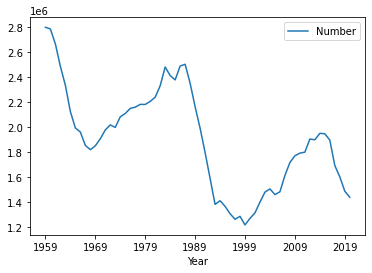

In [127]:
data.plot.line()

# Задание: Получение котировок акций
Получите данные по котировкам акций со страницы:

mfd.ru/marketdata/?id=5&group=16&mode=3&sortHeader=name&sortOrder=1&selectedDate=01.11.2019

и найдите, по какому тикеру был максимальный рост числа сделок (в процентах) за 1 ноября 2019 года.
Вопросы к этому заданию

По какому тикеру был максимальный рост числа сделок (в процентах) за 1 ноября 2019 года?

**ИКРУСС-ИНВ**

In [129]:
r = requests.get("https://mfd.ru/marketdata/?id=5&group=16&mode=3&sortHeader=name&sortOrder=1&selectedDate=01.11.2019")

In [130]:
r

<Response [200]>

In [132]:
r.content

b'<!DOCTYPE html>\r\n<html>\r\n    <head>\r\n        <meta charset="utf-8" />\r\n        <meta http-equiv="X-UA-Compatible" content="IE=edge" />\r\n        <title>\xd0\x9a\xd0\xbe\xd1\x82\xd0\xb8\xd1\x80\xd0\xbe\xd0\xb2\xd0\xba\xd0\xb8 \xd0\x9c\xd0\xbe\xd1\x81\xd0\x91\xd0\xb8\xd1\x80\xd0\xb6\xd0\xb0 \xd0\x90\xd0\xba\xd1\x86\xd0\xb8\xd0\xb8 \xd0\xb8 \xd0\x9f\xd0\x98\xd0\xa4\xd1\x8b</title>\r\n                <link rel="shortcut icon" href="/static/styles/favicons/mfd.ru.ico" />\r\n                \r\n\r\n    <link rel="alternate" type="application/rss+xml" href="/rss/news/handler.ashx" title="\xd0\xa4\xd0\xb8\xd0\xbd\xd0\xb0\xd0\xbd\xd1\x81\xd0\xbe\xd0\xb2\xd1\x8b\xd0\xb5 \xd0\xbd\xd0\xbe\xd0\xb2\xd0\xbe\xd1\x81\xd1\x82\xd0\xb8" />\r\n    <link rel="alternate" type="application/rss+xml" href="/rss/comments/handler.ashx" title="\xd0\x9a\xd0\xbe\xd0\xbc\xd0\xbc\xd0\xb5\xd0\xbd\xd1\x82\xd0\xb0\xd1\x80\xd0\xb8\xd0\xb8 \xd0\xb0\xd0\xbd\xd0\xb0\xd0\xbb\xd0\xb8\xd1\x82\xd0\xb8\xd0\xba\xd0\xbe\

In [133]:
html = BeautifulSoup(r.content)

In [148]:
table = html.find_all("table") 
len(table)

2

In [149]:
table[1]

<table class="mfd-table" id="marketDataList">
<tbody><tr><th class="mfdSortAscending" rowspan="2"><a href="#" onclick="return Mfd.sort_onClick(this, 'name', 'Descending');" title="Сортировать по убыванию">Тикер</a></th><th class="mfdSortNone" rowspan="2"><a href="#" onclick="return Mfd.sort_onClick(this, 'time', 'Descending');" title="Сортировать по убыванию">Время</a></th><th colspan="8">Цена</th><th colspan="2">Объем за день</th><th class="mfdSortNone" rowspan="2"><a href="#" onclick="return Mfd.sort_onClick(this, 'numberoftrades', 'Descending');" title="Сортировать по убыванию">Кол-во сделок</a></th></tr><tr><th class="mfdSortNone" colspan="3"><a href="#" onclick="return Mfd.sort_onClick(this, 'last', 'Descending');" title="Сортировать по убыванию">сделки</a></th><th>пред закр</th><th>откр</th><th>мин</th><th>макс</th><th>срвзв</th><th class="mfdSortNone"><a href="#" onclick="return Mfd.sort_onClick(this, 'amount', 'Descending');" title="Сортировать по убыванию">шт</a></th><th class

In [151]:
data = []
for tr in table[1].find_all("tr"):
    data.append([td.get_text() for td in tr.find_all("td")])

In [152]:
data

[[],
 [],
 ['+МосЭнерго',
  '01.11.2019',
  '2.29',
  '+0.0215',
  '+0.95%',
  '2.2685',
  '2.28',
  '2.268',
  '2.2925',
  '2.281',
  '4 299 000',
  '9 802 392.5',
  '517\r\n            '],
 ['AGRO-гдр',
  '01.11.2019',
  '677.4',
  '−4',
  '−0.59%',
  '681.4',
  '681.4',
  '672',
  '687.6',
  '678.2',
  '19 879',
  '13 481 438.4',
  '1 152\r\n            '],
 ['ENPL-гдр',
  '01.11.2019',
  '591',
  '+3.6',
  '+0.61%',
  '587.4',
  '590.2',
  '578.2',
  '595',
  '591',
  '90 989',
  '53 760 851.6',
  '605\r\n            '],
 ['FIVE-гдр',
  '01.11.2019',
  '2 168',
  '+21',
  '+0.98%',
  '2 147',
  '2 142.5',
  '2 131',
  '2 197',
  '2 169',
  '235 353',
  '510 463 327.5',
  '4 858\r\n            '],
 ['FXAU ETF',
  '01.11.2019',
  '1 985',
  '−2',
  '−0.10%',
  '1 987',
  '1 993',
  '1 980',
  '2 000',
  '1 992',
  '490',
  '976 277',
  '99\r\n            '],
 ['FXCN ETF',
  '01.11.2019',
  '2 512',
  '+14',
  '+0.56%',
  '2 498',
  '2 506',
  '2 506',
  '2 530',
  '2 518',
  '1 667',

In [223]:
data1 = pd.DataFrame(data)

In [217]:
data1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,None,None,None,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None,None,None,None,None,None
2,+МосЭнерго,01.11.2019,2.29,+0.0215,+0.95%,2.2685,2.28,2.268,2.2925,2.281,4 299 000,9 802 392.5,517\r\n
3,AGRO-гдр,01.11.2019,677.4,−4,−0.59%,681.4,681.4,672,687.6,678.2,19 879,13 481 438.4,1 152\r\n
4,ENPL-гдр,01.11.2019,591,+3.6,+0.61%,587.4,590.2,578.2,595,591,90 989,53 760 851.6,605\r\n


In [224]:
data1.drop([0, 1], axis=0, inplace=True)
data1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
2,+МосЭнерго,01.11.2019,2.29,+0.0215,+0.95%,2.2685,2.28,2.268,2.2925,2.281,4 299 000,9 802 392.5,517\r\n
3,AGRO-гдр,01.11.2019,677.4,−4,−0.59%,681.4,681.4,672,687.6,678.2,19 879,13 481 438.4,1 152\r\n
4,ENPL-гдр,01.11.2019,591,+3.6,+0.61%,587.4,590.2,578.2,595,591,90 989,53 760 851.6,605\r\n
5,FIVE-гдр,01.11.2019,2 168,+21,+0.98%,2 147,2 142.5,2 131,2 197,2 169,235 353,510 463 327.5,4 858\r\n
6,FXAU ETF,01.11.2019,1 985,−2,−0.10%,1 987,1 993,1 980,2 000,1 992,490,976 277,99\r\n


In [225]:
data1.reset_index(drop=True, inplace=True)
data1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,+МосЭнерго,01.11.2019,2.29,+0.0215,+0.95%,2.2685,2.28,2.268,2.2925,2.281,4 299 000,9 802 392.5,517\r\n
1,AGRO-гдр,01.11.2019,677.4,−4,−0.59%,681.4,681.4,672,687.6,678.2,19 879,13 481 438.4,1 152\r\n
2,ENPL-гдр,01.11.2019,591,+3.6,+0.61%,587.4,590.2,578.2,595,591,90 989,53 760 851.6,605\r\n
3,FIVE-гдр,01.11.2019,2 168,+21,+0.98%,2 147,2 142.5,2 131,2 197,2 169,235 353,510 463 327.5,4 858\r\n
4,FXAU ETF,01.11.2019,1 985,−2,−0.10%,1 987,1 993,1 980,2 000,1 992,490,976 277,99\r\n


In [226]:
data1.loc[:, 4]

0      +0.95%
1      −0.59%
2      +0.61%
3      +0.98%
4      −0.10%
        ...  
368    −1.05%
369    +2.59%
370    −3.10%
371      None
372      None
Name: 4, Length: 373, dtype: object

In [227]:
data1.loc[:, 4].fillna("0%", inplace=True)
data1.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
368,Якутскэн-п,01.11.2019,0.282,−0.003,−1.05%,0.285,0.278,0.278,0.2895,0.2855,640 000,182 635,18\r\n
369,Якутскэнрг,01.11.2019,0.2975,+0.0075,+2.59%,0.29,0.2925,0.29,0.301,0.2965,970 000,287 700,42\r\n
370,ЯТЭК ао,01.11.2019,20.66,−0.66,−3.10%,21.32,21.68,20.5,21.68,20.82,29 500,613 836,85\r\n
371,None,None,None,None,0%,None,None,None,None,None,None,None,None
372,None,None,None,None,0%,None,None,None,None,None,None,None,None


In [250]:
data2 = pd.DataFrame({"Tiker": data1[0], "Bargain": data1[4]})
data2.head()

,Tiker,Bargain
0,+МосЭнерго,+0.95%
1,AGRO-гдр,−0.59%
2,ENPL-гдр,+0.61%
3,FIVE-гдр,+0.98%
4,FXAU ETF,−0.10%


In [251]:
data2[:15]

,Tiker,Bargain
0,+МосЭнерго,+0.95%
1,AGRO-гдр,−0.59%
2,ENPL-гдр,+0.61%
3,FIVE-гдр,+0.98%
4,FXAU ETF,−0.10%
5,FXCN ETF,+0.56%
6,FXDE ETF,+0.02%
7,FXGD ETF,−0.81%
8,FXJP ETF,+0.62%
9,FXKZ ETF,+0.18%


In [252]:
data2['Bargain'].apply(type)

0      <class 'str'>
1      <class 'str'>
2      <class 'str'>
3      <class 'str'>
4      <class 'str'>
           ...      
368    <class 'str'>
369    <class 'str'>
370    <class 'str'>
371    <class 'str'>
372    <class 'str'>
Name: Bargain, Length: 373, dtype: object

In [256]:
def proc(x):
    if x == '':
        x = '0'
    if x[-1] == '%':
        x = x[:-1]
    if not(x[0].isdigit()):
        if x[0] == '+':
            x = float(x[1:])
        else: 
            x = -1 * float(x[1:])
    return float(x)

In [257]:
data2['Bargain'] = data2['Bargain'].apply(proc)
data2.head()

,Tiker,Bargain
0,+МосЭнерго,0.95
1,AGRO-гдр,-0.59
2,ENPL-гдр,0.61
3,FIVE-гдр,0.98
4,FXAU ETF,-0.10


In [258]:
data2['Bargain'] = data2['Bargain'].astype("float64")

In [259]:
data2.sort_values("Bargain", ascending=False)

,Tiker,Bargain
113,ИКРУСС-ИНВ,11.00
181,Мостотрест,8.14
305,Сургнфгз,7.57
149,КурганГКап,7.05
148,КурганГКао,6.25
...,...,...
265,РОСИНТЕРао,-3.27
336,ТНСэнЯр-п,-3.95
106,ЗПИФ КапВл,-4.35
162,МагадЭн ап,-5.73
